**Задача: Произвести сегментацию клиентов для выявления различных групп**

**Подключение библиотек**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 8)
PATH = 'C:\\Users\\Илья\\Downloads\\'

# Загрузка данных

In [4]:
data = pd.read_excel(PATH + 'for_clustering.xlsx')

In [5]:
data.head()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,0.081007,1,1,60,12,963.01,1,1,2,2
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,0.036766,1,0,91,15,1534.69,1,1,2,2
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,0.112974,1,1,13,2,1514.48,1,1,3,3
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,0.027406,1,0,68,35,1872.24,1,1,2,2
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,0.042788,1,1,22,3,557.97,1,1,1,1


Посмотрим на размер датафрейма

In [6]:
data.shape

(27508, 45)

Посмотрим основную информацию о датасете

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27508 entries, 0 to 27507
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id_client                 27508 non-null  int64  
 1   InWeek_amount             27508 non-null  float64
 2   InWeek_SKU                27508 non-null  int64  
 3   Checkinmonth_average      27508 non-null  int64  
 4   Checkamount_mean          27508 non-null  float64
 5   Count_transac             27508 non-null  int64  
 6   Total_amount              27508 non-null  float64
 7   Total_SKU_qnt             27508 non-null  int64  
 8   Count_departments         27508 non-null  int64  
 9   Count_shop                27508 non-null  int64  
 10  Count_city                27508 non-null  int64  
 11  Tenure                    27508 non-null  int64  
 12  SKU_meanbytransac         27508 non-null  int64  
 13  Amount_last6mnth          27508 non-null  float64
 14  Check_

Проверим наличие пустых значений в колонках

In [8]:
data.Age.isna().sum()

152

In [9]:
data.Gender.isna().sum() / data.shape[0] * 100

0.8761087683582959

In [10]:
data.Age.isna().sum() / data.shape[0] * 100

0.5525665261014978

In [11]:
data.Age_group.isna().sum() / data.shape[0] * 100

0.5525665261014978

In [12]:
null_data = data[data.isnull().any(axis=1)]
null_data

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
97,8411,275.0383,42,6,52.1391,225,11705.66,1563,28,3,...,0.006580,1,0,35,8,635.92,1,1,2,2
127,8680,118.7484,38,4,25.7853,175,4512.44,1493,29,6,...,0.069700,1,0,60,14,197.65,1,1,1,1
211,10851,470.6247,23,2,408.0132,27,10824.37,812,33,1,...,0.030544,1,1,31,1,600.00,1,1,3,3
214,10862,234.4774,51,6,36.7788,325,11958.35,1688,33,4,...,0.082734,1,0,81,19,1333.97,1,1,2,2
222,10977,140.9803,30,2,81.3348,52,4229.41,412,25,5,...,0.032152,1,0,45,7,592.31,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25756,388416,469.2812,25,2,165.2398,71,11732.03,868,28,5,...,0.127416,1,1,25,3,1076.98,1,1,3,3
26022,390180,175.0078,23,2,93.6088,43,4025.18,460,17,1,...,0.044844,1,1,16,5,157.22,1,1,1,1
26452,397099,622.8025,20,2,444.8589,28,12456.05,411,25,1,...,0.114898,1,1,30,2,944.64,1,0,3,3
26922,404303,381.1940,27,6,66.3975,156,10292.24,1214,26,7,...,0.034299,1,0,63,18,1279.71,1,1,2,2


In [13]:
null_data[['Gender', 'Age', 'Age_group']]                 

,Gender,Age,Age_group
97,NaN,55.0,55-65
127,NaN,NaN,NaN
211,NaN,55.0,55-65
214,NaN,55.0,55-65
222,NaN,55.0,55-65
...,...,...,...
25756,NaN,NaN,NaN
26022,NaN,NaN,NaN
26452,NaN,NaN,NaN
26922,NaN,NaN,NaN


Т.к количество строк с пропуском относительно всего датасета небольшое, то можем удалить данные строки

In [14]:
data = data.dropna()

In [15]:
data.drop_duplicates()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,0.081007,1,1,60,12,963.01,1,1,2,2
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,0.036766,1,0,91,15,1534.69,1,1,2,2
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,0.112974,1,1,13,2,1514.48,1,1,3,3
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,0.027406,1,0,68,35,1872.24,1,1,2,2
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,0.042788,1,1,22,3,557.97,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,822495,334.3064,17,2,193.4472,31,6164.92,317,29,1,...,0.039069,1,1,27,4,916.60,1,1,3,3
27504,822844,214.9182,17,2,169.9322,21,3653.61,412,25,1,...,0.054391,1,1,37,5,488.53,1,1,1,1
27505,823011,530.7692,13,2,271.0285,25,7509.19,434,19,1,...,0.040563,1,1,33,3,1100.92,1,0,3,3
27506,823218,374.4395,23,2,254.5211,33,8612.11,465,30,3,...,0.032137,1,1,64,6,1442.23,1,1,3,3


Выведем основные описательные статистики датасета

In [16]:
data.describe()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
count,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,...,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000,27267.000000
mean,210554.677412,314.727674,31.429677,2.558844,159.693040,82.136795,9585.634168,762.858547,26.738915,3.857703,...,0.058615,0.999963,0.547585,40.356695,8.388125,936.866392,0.998056,0.921003,2.003741,2.003741
std,121847.905725,144.464143,11.376459,1.195365,111.530519,62.795554,4712.874709,451.270900,4.036792,2.760003,...,0.048948,0.006056,0.497740,23.757077,7.202557,590.731978,0.044046,0.269738,0.776111,0.776111
min,5743.000000,34.474000,2.000000,2.000000,10.239800,4.000000,739.360000,33.000000,7.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,99.000000,0.000000,0.000000,1.000000,1.000000
25%,105584.500000,212.991350,23.000000,2.000000,85.936900,39.000000,5888.720000,431.000000,24.000000,2.000000,...,0.022685,1.000000,0.000000,22.000000,3.000000,447.800000,1.000000,1.000000,1.000000,1.000000
50%,212782.000000,289.203400,31.000000,2.000000,128.850800,66.000000,8808.650000,673.000000,27.000000,3.000000,...,0.047558,1.000000,1.000000,37.000000,6.000000,827.110000,1.000000,1.000000,2.000000,2.000000
75%,309896.500000,385.203400,41.000000,2.000000,199.414400,108.000000,12621.820000,1001.500000,30.000000,5.000000,...,0.081679,1.000000,1.000000,56.000000,11.000000,1330.255000,1.000000,1.000000,3.000000,3.000000
max,830188.000000,2180.013700,51.000000,20.000000,1326.115700,990.000000,22748.390000,5058.000000,38.000000,46.000000,...,0.887302,1.000000,1.000000,180.000000,112.000000,2478.470000,1.000000,1.000000,3.000000,3.000000


Выясним какие колонки являются категориальными, для дальнейшего преобразования

In [17]:
obj_col = data.select_dtypes('object').columns
obj_col

Index(['Gender', 'Age_group'], dtype='object')

In [18]:
data.Gender.value_counts()

F    18781
M     8486
Name: Gender, dtype: int64

In [19]:
data.Age_group.value_counts()

25-35    7121
35-45    6875
45-55    4941
55-65    4071
65+      2354
0-25     1905
Name: Age_group, dtype: int64

# RFM  анализ

**Предположим, что все данные для проведения RFM-анализа имеются в датасете.   
'Days_pastvisit' - Recency (Дней с последнего заказа),    
'Count_transac' - frequency(Количество заказов),    
'Total_amount' - monetary_value(Сумма заказов)**

In [20]:
rfm_df = data[['Id_client', 'Days_pastvisit', 'Count_transac', 'Total_amount']]
rfm_df.columns= ['Id_client', 'recency', 'frequency', 'monetary_value']

In [21]:
rfm_df.shape[0], data['Id_client'].nunique()

(27267, 27267)

In [22]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27267 entries, 0 to 27507
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id_client       27267 non-null  int64  
 1   recency         27267 non-null  int64  
 2   frequency       27267 non-null  int64  
 3   monetary_value  27267 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.0 MB


###  Построим графики распределения для выбранным колонок, чтобы посмотреть распределения

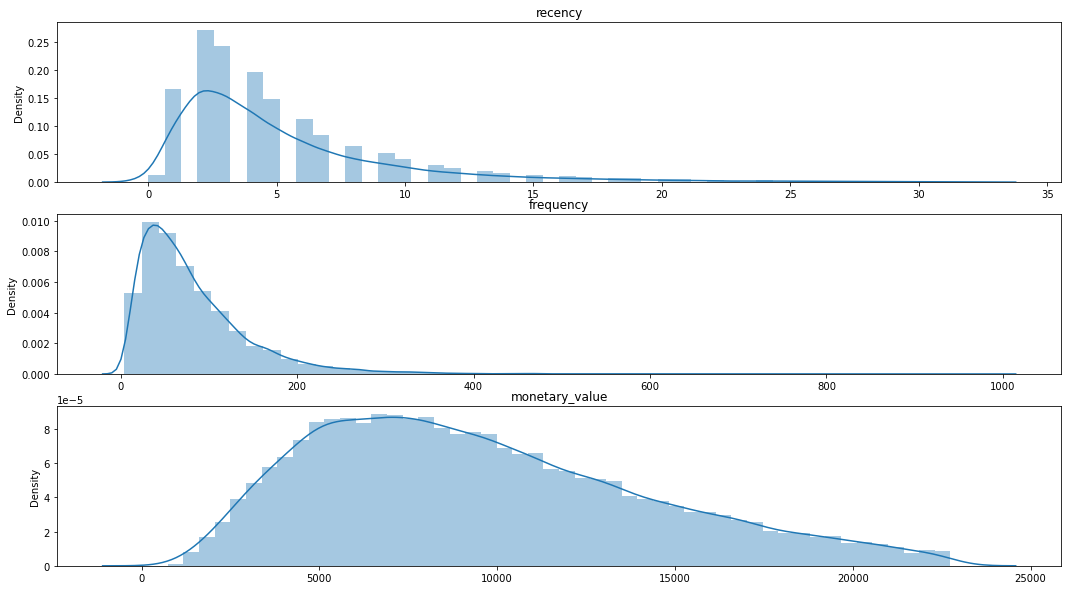

In [23]:
plt.figure(figsize=(18,10))

plt.subplot(3, 1, 1) 
sns.distplot(np.array(rfm_df['recency']))
plt.title('recency'); 

plt.subplot(3, 1, 2) 
sns.distplot(np.array(rfm_df['frequency']))
plt.title('frequency'); 

plt.subplot(3, 1, 3) 
sns.distplot(np.array(rfm_df['monetary_value']))
plt.title('monetary_value'); 

plt.show();

Частота покупок и время с последней активности сильнее скошены вправо, чем сумма покупки

### Разобъем данные на квартили

In [24]:
quantile = rfm_df.quantile([0.25, 0.5, 0.75])
quantile

,Id_client,recency,frequency,monetary_value
0.25,105584.5,2.0,39.0,5888.72
0.50,212782.0,4.0,66.0,8808.65
0.75,309896.5,7.0,108.0,12621.82


### Напишем функции для отнесения строк к определенным классам в зависимости от попдадания в квантили

In [26]:
def r_class(value, params, quant_table):
    if value <= quant_table[params][0.25]:
        return 1
    elif value <= quant_table[params][0.50]:
        return 2
    elif value <= quant_table[params][0.75]:
        return 3
    else:
        return 4

In [27]:
def fm_class(value, params, quant_table):
    if value <= quant_table[params][0.25]:
        return 4
    elif value <= quant_table[params][0.50]:
        return 3
    elif value <= quant_table[params][0.75]:
        return 2
    else:
        return 1

In [28]:
rfm_segmentation = rfm_df.copy()

### Определим квантили

In [29]:
rfm_segmentation['r_quartile'] = rfm_segmentation['recency'].apply(r_class, args=('recency', quantile))
rfm_segmentation['f_quartile'] = rfm_segmentation['frequency'].apply(fm_class, args=('frequency', quantile))
rfm_segmentation['m_quartile'] = rfm_segmentation['monetary_value'].apply(fm_class, args=('monetary_value', quantile))

In [30]:
rfm_segmentation['RFM'] = rfm_segmentation['r_quartile'].map(str) \
                        + rfm_segmentation['f_quartile'].map(str) \
                        + rfm_segmentation['m_quartile'].map(str) 

In [31]:
rfm_segmentation

,Id_client,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM
0,5743,3,119,12398.51,2,1,2,212
1,5756,2,130,12959.65,1,1,1,111
2,5781,8,29,2963.88,4,4,4,444
3,5801,0,404,19676.34,1,1,1,111
4,5808,8,25,2482.24,4,4,4,444
...,...,...,...,...,...,...,...,...
27503,822495,6,31,6164.92,3,4,3,343
27504,822844,8,21,3653.61,4,4,4,444
27505,823011,7,25,7509.19,3,4,3,343
27506,823218,8,33,8612.11,4,4,3,443


In [32]:
rfm_segmentation.recency.describe()

count    27267.000000
mean         5.304251
std          4.553697
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         32.000000
Name: recency, dtype: float64

Посмотрим как рапределены сегменты

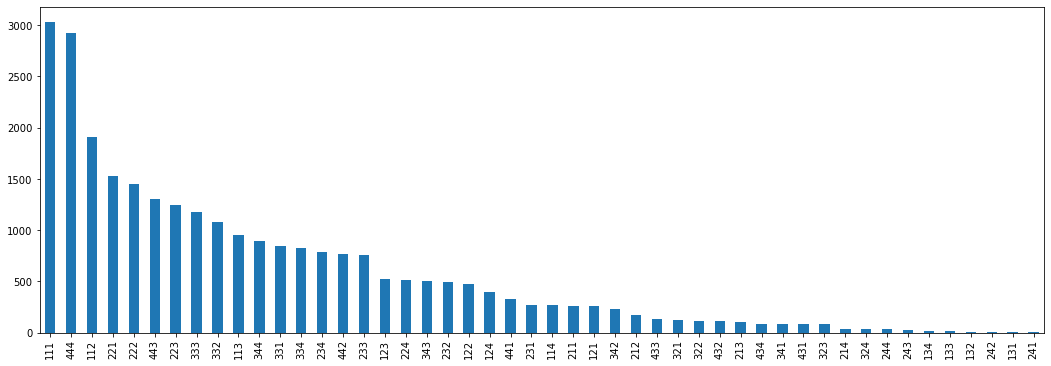

In [33]:
plt.rcParams['figure.figsize'] = (18, 6)
rfm_segmentation['RFM'].value_counts().sort_values(ascending=False).plot(kind='bar');

### Описание полученных сегментов

RFM = 111 — имеют высокий чек, часто покупают и совершали покупки недавно. Самые лояльным и активные пользователи.  
RFM = 444 — имеют низкий чек, покупают нечасто и давно совершали покупки. Скорее всего потерянные клиенты. Возможно не стоит предпринять действия по их возврату, если цена привлечения выше ожидаемой прибыли.

R=4, F=1      - Новые покупатели
R=4, F=4, M=3 - Лояльные покупатели

R=1-2, F=2-4, M=3-4 —  лояльные пользователи на грани ухода. Стоит предложить им скидку, чтобы стимулировать совершить повторный  заказ.  
R=3-4, F=1, M=1-2-3-4 — пользователи недавно совершили платеж.  

In [34]:
rfm_segmentation['RFM_Score'] = rfm_segmentation[['r_quartile','f_quartile','m_quartile']].sum(axis=1)

In [35]:
def rfm_level(data):
    if data['RFM_Score'] >= 9:
        return 'Не можем потерять'
    elif ((data['RFM_Score'] >= 8) and (data['RFM_Score'] < 9)):
        return 'Лидеры'
    elif ((data['RFM_Score'] >= 7) and (data['RFM_Score'] < 8)):
        return 'Лояльные клиенты'
    elif ((data['RFM_Score'] >= 6) and (data['RFM_Score'] < 7)):
        return 'Потенциально лояльные'
    elif ((data['RFM_Score'] >= 5) and (data['RFM_Score'] < 6)):
        return 'Подающие надежды'
    elif ((data['RFM_Score'] >= 4) and (data['RFM_Score'] < 5)):
        return 'Нужно обратить внимание!'
    else:
        return 'Требуют активации'

In [36]:
rfm_segmentation['Segment'] = rfm_segmentation.apply(rfm_level, axis=1)

In [38]:
rfm_segmentation.head(20)

,Id_client,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFM,RFM_Score,Segment
0,5743,3,119,12398.51,2,1,2,212,5,Подающие надежды
1,5756,2,130,12959.65,1,1,1,111,3,Требуют активации
2,5781,8,29,2963.88,4,4,4,444,12,Не можем потерять
3,5801,0,404,19676.34,1,1,1,111,3,Требуют активации
4,5808,8,25,2482.24,4,4,4,444,12,Не можем потерять
5,5820,4,75,3927.88,2,2,4,224,8,Лидеры
6,5828,2,129,9808.45,1,1,2,112,4,Нужно обратить внимание!
7,5834,2,118,9353.27,1,1,2,112,4,Нужно обратить внимание!
8,5859,2,149,8620.35,1,1,3,113,5,Подающие надежды
9,5860,3,78,5601.56,2,2,4,224,8,Лидеры


In [494]:
# # Условное обозначение сегментов
# seg_map = {
#     r'[1-2][1-2]': 'Аутсайдеры',
#     r'[1-2][2-3]': 'Риск потерять',
#     r'[1-2]4': 'Нельзя потерять',
#     r'2[1-2]': 'Спящие',
#     r'22': 'Нужно обратить внимание',
#     r'[2-3][3-4]': 'Лояльные покупатели',
#     r'31': 'С высоим потенциалом',
#     r'41': 'Новые покупатели',
#     r'[3-4][1-2]': 'Потенциально лояльные',
#     r'4[3-4]': 'Лучшие покупатели'
# }

In [495]:
# rfm_segmentation['Segment'] = rfm_segmentation['r_quartile'].map(str) + rfm_segmentation['f_quartile'].map(str)
# rfm_segmentation['Segment'] = rfm_segmentation['Segment'].replace(seg_map, regex=True)

RF-анализ. Анализ по давности и частоте покупок. Показывает, как часто клиенты совершают покупки за анализируемый период. Позволяет выявить клиентов, которые недавно что-то купили и сотрудничают с компанией постоянно.

RM-анализ. Распределение покупателей по параметрам Recency и Monetary. Позволяет выявить клиентов, которые приносят больше всего прибыли. И тех, чей вклад в общую прибыль незначителен.

FM-анализ. Распределение клиентов в зависимости от частоты и суммы покупок. Позволяет выявить клиентов, которые покупают мало, но на большие суммы. И тех, кто совершает покупки часто, но с маленькими чеками.

In [72]:
rfm_stats = (rfm_segmentation[['Segment','recency', 'frequency', 'monetary_value']]
             .groupby('Segment')
             .agg(['mean','median','count'])
             ).round(2)

rfm_stats.columns = rfm_stats.columns.map('_'.join).str.strip('|')
rfm_stats = rfm_stats.reset_index()
rfm_stats

,Segment,recency_mean,recency_median,recency_count,frequency_mean,frequency_median,frequency_count,monetary_value_mean,monetary_value_median,monetary_value_count
0,Лидеры,4.70,5,2625,58.59,57,2625,8649.46,8595.39,2625
1,Лояльные клиенты,3.94,4,3145,71.25,70,3145,9919.25,8593.92,3145
2,Не можем потерять,9.34,8,10163,33.42,32,10163,6122.89,5577.54,10163
3,Нужно обратить внимание!,1.72,2,2426,152.88,135,2426,11850.58,11228.89,2426
4,Подающие надежды,2.60,3,3135,108.96,99,3135,12356.11,12341.19,3135
5,Потенциально лояльные,3.00,3,2744,89.69,85,2744,10000.21,9921.92,2744
6,Требуют активации,1.44,1,3029,186.03,167,3029,16611.81,16194.61,3029


In [90]:
# Количество самых лояльныъх клиентов
loyalty_customers = (
    rfm_stats
        .query('Segment in ("Лидеры", "Лояльные клиенты", "Не можем потерять")')
        .sum()['recency_count']
)
loyalty_customers

15933

In [91]:
# Количество клиентов, с которыми необходимо провести некоторые действия, чтобы они перешли в группу лояльных
need_some_work = (
    rfm_stats
         .query('Segment not in ("Лидеры", "Лояльные клиенты", "Не можем потерять")')
         .sum()['recency_count']
)
need_some_work

11334

In [99]:
print(f'Процент лояльных клиентов от общего количества: {loyalty_customers / (loyalty_customers+need_some_work):.1%}')

Процент лояльных клиентов от общего количества 58.4%


Имеем пракьтически 60% процентов клиентов с высокой лояльностью к нашей организации. С 40% остальными процентами необходимо провести различные мероприятия для того, чтобы они перешли в группу лояльных. 

In [104]:
!pip install squarify

In [106]:
import squarify

In [113]:
rfm_stats.columns

Index(['Segment', 'recency_mean', 'recency_median', 'recency_count',
       'frequency_mean', 'frequency_median', 'frequency_count',
       'monetary_value_mean', 'monetary_value_median', 'monetary_value_count'],
      dtype='object')

In [114]:
rfm_stats

,Segment,recency_mean,recency_median,recency_count,frequency_mean,frequency_median,frequency_count,monetary_value_mean,monetary_value_median,monetary_value_count
0,Лидеры,4.70,5,2625,58.59,57,2625,8649.46,8595.39,2625
1,Лояльные клиенты,3.94,4,3145,71.25,70,3145,9919.25,8593.92,3145
2,Не можем потерять,9.34,8,10163,33.42,32,10163,6122.89,5577.54,10163
3,Нужно обратить внимание!,1.72,2,2426,152.88,135,2426,11850.58,11228.89,2426
4,Подающие надежды,2.60,3,3135,108.96,99,3135,12356.11,12341.19,3135
5,Потенциально лояльные,3.00,3,2744,89.69,85,2744,10000.21,9921.92,2744
6,Требуют активации,1.44,1,3029,186.03,167,3029,16611.81,16194.61,3029


In [120]:
rfm_stats = rfm_stats[['recency_mean','frequency_mean','monetary_value_mean', 'monetary_value_count']]

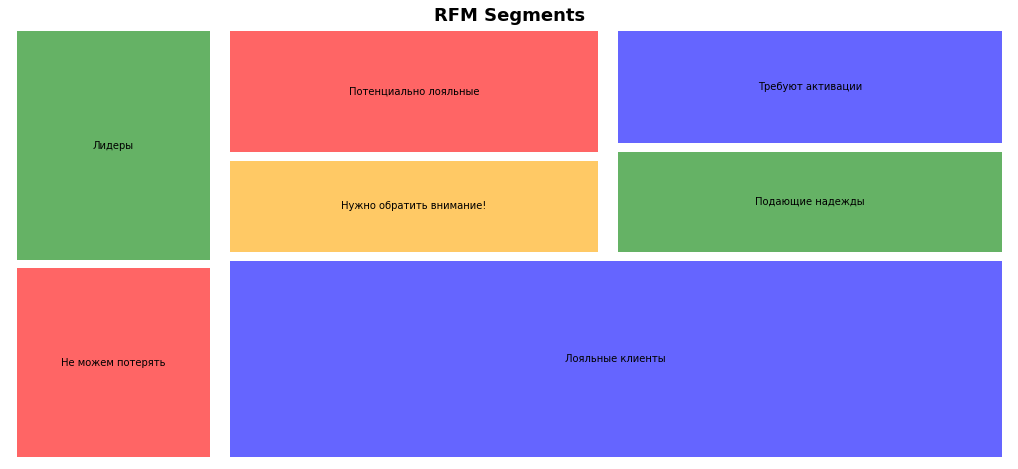

In [126]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(18, 8)
color = ['red', 'green', 'blue', 'orange']
squarify.plot(sizes=rfm_stats['monetary_value_count'], 
              label=['Не можем потерять',
                     'Лидеры',
                     'Лояльные клиенты',
                     'Нужно обратить внимание!',
                     'Потенциально лояльные', 
                     'Подающие надежды', 
                     'Требуют активации'], 
             alpha=.6,
             color=color,
             pad = True)
plt.title('RFM Segments', 
          fontsize=18, 
          fontweight='bold')
plt.axis('off')
plt.show()

# RFM с K-means

## Подготовка данных

**Предположим, что все данные для проведения RFM-анализа имеются в датасете.   
'Days_pastvisit' - Recency (Дней с последнего заказа),    
'Count_transac' - frequency(Количество заказов),    
'Total_amount' - monetary_value(Сумма заказов)**

In [432]:
data_segment = data[['Id_client', 'Days_pastvisit', 'Count_transac', 'Total_amount']]
data_segment.columns= ['Id_client', 'recency', 'frequency', 'monetary_value']

In [434]:
data_segment.head()

,Id_client,recency,frequency,monetary_value
0,5743,3,119,12398.51
1,5756,2,130,12959.65
2,5781,8,29,2963.88
3,5801,0,404,19676.34
4,5808,8,25,2482.24


### Recency

In [435]:
recency = data_segment[['Id_client', 'recency']]

In [436]:
recency['recency'].describe()

count    27267.000000
mean         5.304251
std          4.553697
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         32.000000
Name: recency, dtype: float64

Среднее количестов дней между последним заказом - 5, максимальное - 32. 50% пользователей и меньше - делают заказы с периодичностью 4 дня.

**Распределение заказов**

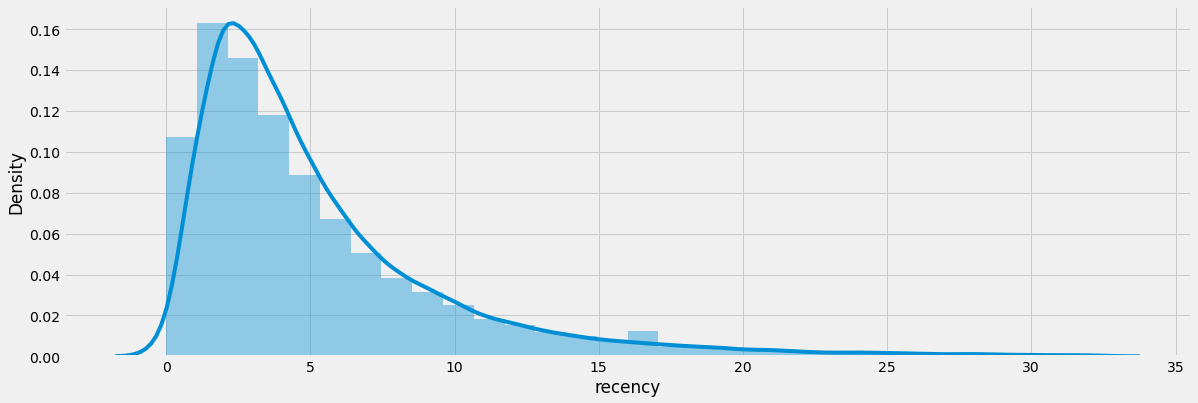

In [390]:
sns.distplot(recency['recency'], bins=30);

In [438]:
sse={}
data_recency = recency[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs).fit(data_recency)
    data_recency['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 

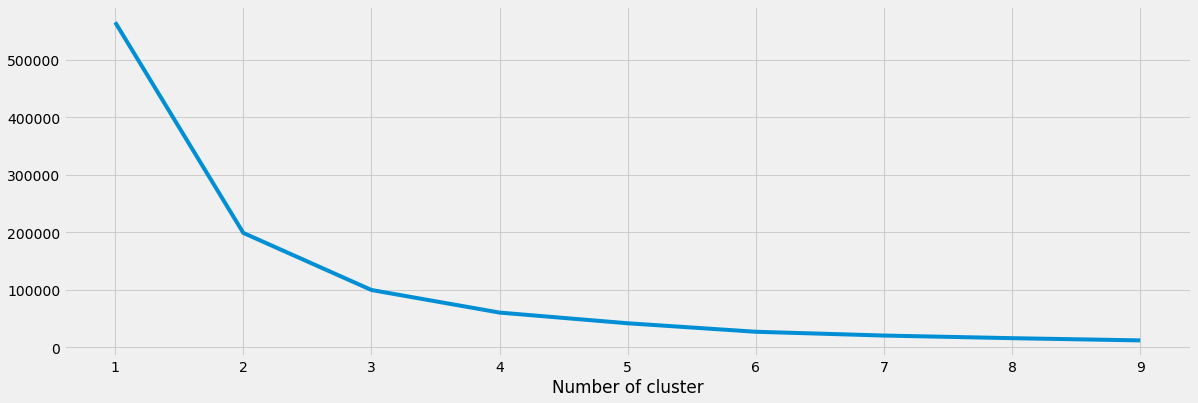

In [439]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

Исходя из полученного графика можно сказать, что оптимальным количестов кластеров будет 3 или 4. Решение об окончательном количестве кластеров должен принимать аналитик исходя из своего опыта.

In [440]:
# Возбмем 4 кластера
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_segment[['recency']])
data_segment['Recency_cluster'] = kmeans.predict(data_segment[['recency']])

In [442]:
#https://www.kaggle.com/shailaja4247/customer-segmentation-rfm-clustering
# Необходимо отсортровать кластеры по значимости

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [443]:
data_segment = order_cluster('Recency_cluster', 'recency', data_segment, False)

### Frequency

In [444]:
frequency = data_segment[['Id_client', 'frequency']]

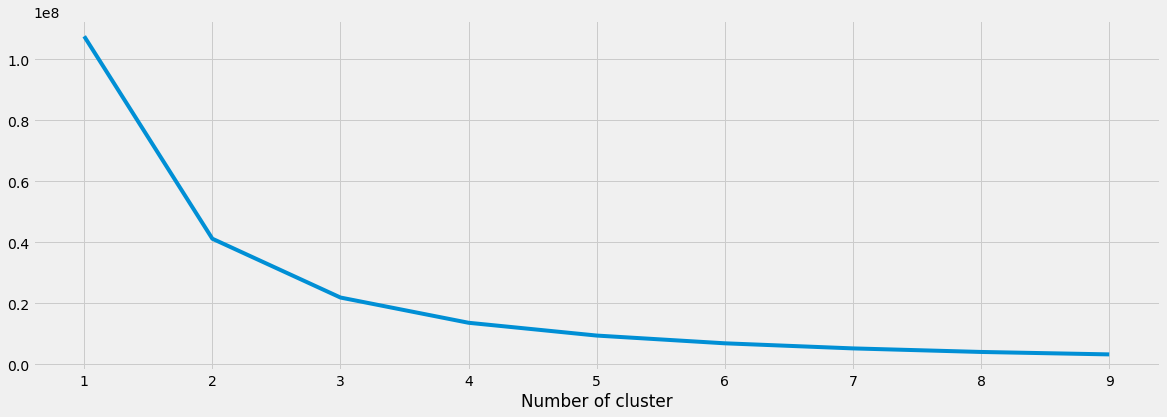

In [445]:
sse={}
data_frequency = frequency[['frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs).fit(data_frequency)
    data_frequency['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [446]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_frequency[['frequency']])
data_segment['frequency_cluster'] = kmeans.predict(data_frequency[['frequency']])

In [447]:
data_segment = order_cluster('frequency_cluster', 'frequency',data_segment,True)

### Monetary value

In [448]:
monetary_value = data_segment[['Id_client', 'monetary_value']]

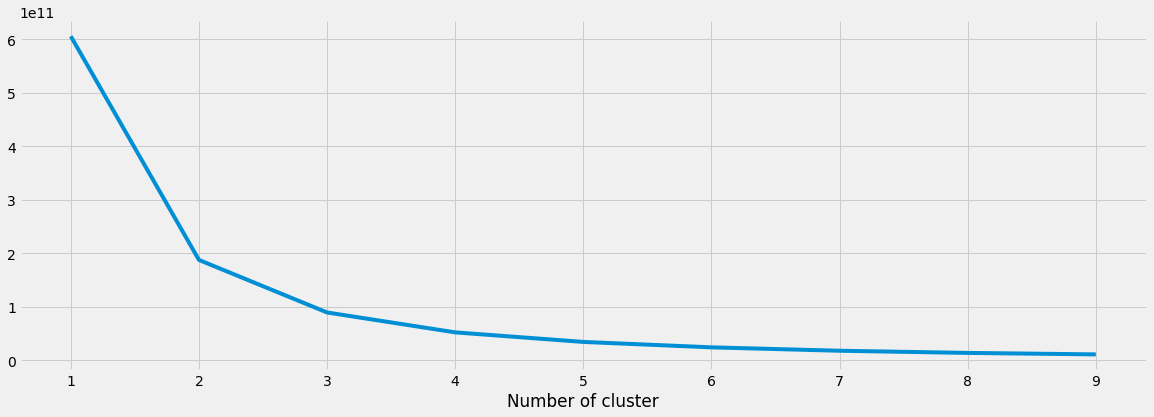

In [449]:
sse={}
data_monetary = monetary_value[['monetary_value']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs).fit(data_monetary)
    data_monetary['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [450]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_segment[['monetary_value']])
data_segment['Monetary_value_cluster'] = kmeans.predict(data_segment[['monetary_value']])

In [451]:
data_segment = order_cluster('Monetary_value_cluster', 'monetary_value',data_segment,True)

In [452]:
data_segment['overall_score'] = data_segment['Recency_cluster'] \
                                + data_segment['frequency_cluster'] \
                                + data_segment['Monetary_value_cluster']

In [453]:
data_segment

,Id_client,recency,frequency,monetary_value,Recency_cluster,frequency_cluster,Monetary_value_cluster,overall_score
0,5743,3,119,12398.51,3,1,2,6
1,5756,2,130,12959.65,3,1,2,6
2,5934,3,104,14221.33,3,1,2,6
3,6284,3,92,10820.57,3,1,2,6
4,7368,3,75,14878.63,3,1,2,6
...,...,...,...,...,...,...,...,...
27262,335606,15,23,19785.78,1,0,3,4
27263,360047,11,18,15939.76,1,0,3,4
27264,394998,9,20,16919.14,1,0,3,4
27265,515778,14,23,17263.39,1,0,3,4


Делим пользователей на 3 глобальных сегмента (упрощенный вариант): Низкая ценность, Средняя ценность, Высокая ценность

In [455]:
data_segment['Segment'] = 'Low-Value'
data_segment.loc[data_segment['overall_score'] > 2, 'Segment'] = 'Mid-Value' 
data_segment.loc[data_segment['overall_score'] > 4, 'Segment'] = 'High-Value' 

Для группы с высокой ценностью:  необходимо работать над удержанием клиентов этой группы 
Для группы со средей ценностью:  необходимо работать над удержанием клиентов и частотой покупок
Для группы со низкой ценностью:  необходимо работать над увеличение частоты покупок

Распределение по сегментам

In [457]:
data_segment['Segment'].value_counts(normalize=True)

High-Value    0.470716
Mid-Value     0.282099
Low-Value     0.247185
Name: Segment, dtype: float64

**Дополнительно.**

Вариант кластеризации при помощи алгоритма K-Means по всему датасету.

K-means. Кодирование категориальных признаков 

In [18]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'].values)
data['Age_group'] = le.fit_transform(data['Age_group'].values)

In [19]:
data.head()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,0.081007,1,1,60,12,963.01,1,1,2,2
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,0.036766,1,0,91,15,1534.69,1,1,2,2
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,0.112974,1,1,13,2,1514.48,1,1,3,3
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,0.027406,1,0,68,35,1872.24,1,1,2,2
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,0.042788,1,1,22,3,557.97,1,1,1,1


In [194]:
#from sklearn.preprocessing import OneHotEncoder

In [195]:
#def code_ohe(data, feature):
#    for i in data[feature].unique():
#        data[feature + '=' + i] = (data[feature] == i).astype(float)

In [196]:
#code_ohe(data, 'Gender')
#code_ohe(data, 'Age_group')

## Масштабирование категориалных признаков

In [21]:
data_new = data.copy()

In [22]:
data_new.head()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,0.081007,1,1,60,12,963.01,1,1,2,2
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,0.036766,1,0,91,15,1534.69,1,1,2,2
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,0.112974,1,1,13,2,1514.48,1,1,3,3
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,0.027406,1,0,68,35,1872.24,1,1,2,2
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,0.042788,1,1,22,3,557.97,1,1,1,1


In [23]:
data_new.set_index('Id_client', inplace=True)

In [24]:
data_new.head()

,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,Count_city,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
Id_client,,,,,,,,,,,,,,,,,,,,,
5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,1,...,0.081007,1,1,60,12,963.01,1,1,2,2
5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,1,...,0.036766,1,0,91,15,1534.69,1,1,2,2
5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,1,...,0.112974,1,1,13,2,1514.48,1,1,3,3
5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,1,...,0.027406,1,0,68,35,1872.24,1,1,2,2
5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,1,...,0.042788,1,1,22,3,557.97,1,1,1,1


In [25]:
scaling = StandardScaler()

In [26]:
scaled = scaling.fit_transform(data_new)

In [27]:
scaled_data = pd.DataFrame(scaled, columns=data_new.columns)

In [28]:
scaled_data.head()

,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,Count_city,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,-0.312851,1.280767,-0.467518,-0.508999,0.587046,0.596860,0.778131,-0.183048,0.051558,-0.269189,...,0.457476,0.006056,0.908956,0.826855,0.501480,0.044257,0.044131,0.292869,-0.00482,-0.00482
1,0.313319,0.401742,1.205642,-0.532705,0.762221,0.715928,0.578691,0.560129,-0.310768,-0.269189,...,-0.446387,0.006056,-1.100164,2.131754,0.918007,1.012023,0.044131,0.292869,-0.00482,-0.00482
2,0.101012,-1.971623,1.205642,-0.515477,-0.846203,-1.405061,-1.313777,-0.678500,-1.035418,-0.269189,...,1.110557,0.006056,0.908956,-1.151539,-0.886941,0.977811,0.044131,0.292869,1.28368,1.28368
3,0.492054,1.720279,4.551961,-0.993809,5.125667,2.141133,3.818489,1.551033,-0.310768,-0.269189,...,-0.637616,0.006056,-1.100164,1.163603,3.694849,1.583444,0.044131,0.292869,-0.00482,-0.00482
4,-0.030788,-2.059525,1.205642,-0.458306,-0.909903,-1.507259,-1.125417,-0.183048,-0.673093,-0.269189,...,-0.323357,0.006056,0.908956,-0.772697,-0.748099,-0.641413,0.044131,0.292869,-1.29332,-1.29332


## K-means. Подбор оптимального количества кластеров. Обучение

### Elbow method

In [104]:
#data = data.copy().drop(['Gender', 'Age_group'], axis=1)

In [52]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 200,
    "random_state": 2021,
}

In [53]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, 
                **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse[k] = kmeans.inertia_ 

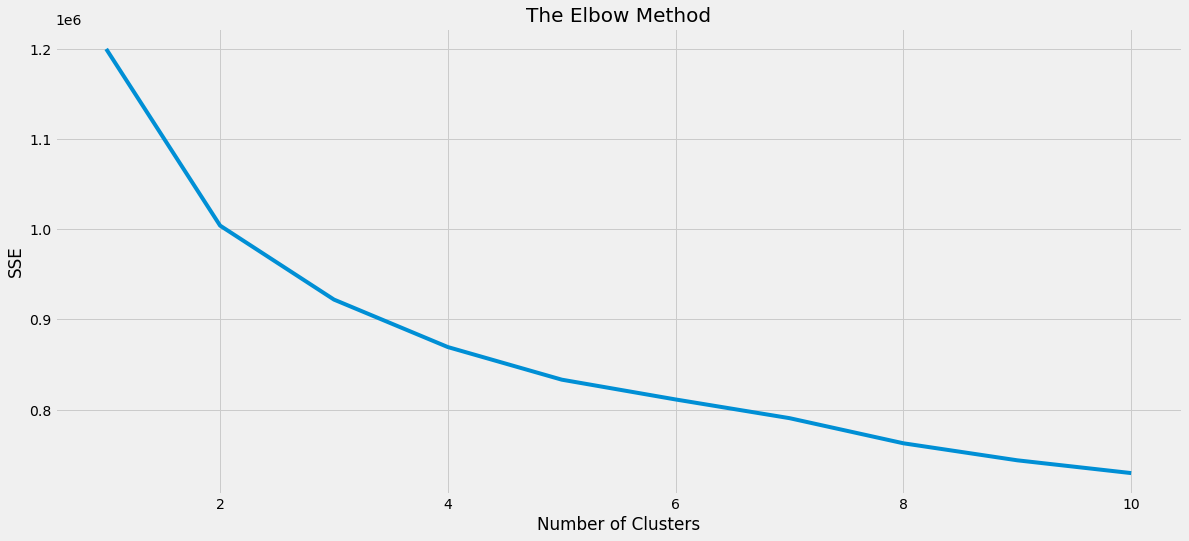

In [54]:
plt.style.use("fivethirtyeight")
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.title('The Elbow Method', fontsize = 20)
plt.ylabel("SSE")
plt.show()

По построенному графику сложно определить оптимальное колиество кластеров. Вероятно оптимальное значенеи лежит в диапазоне 4-6. Применим далее еще один метод определения количества кластеров - Силуэтный метод.

In [66]:
kmeans = KMeans(n_clusters = 4, **kmeans_kwargs)
means_predict = kmeans.fit_predict(scaled_data)

### Silhouette method

In [61]:
from sklearn.metrics import silhouette_score

In [62]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

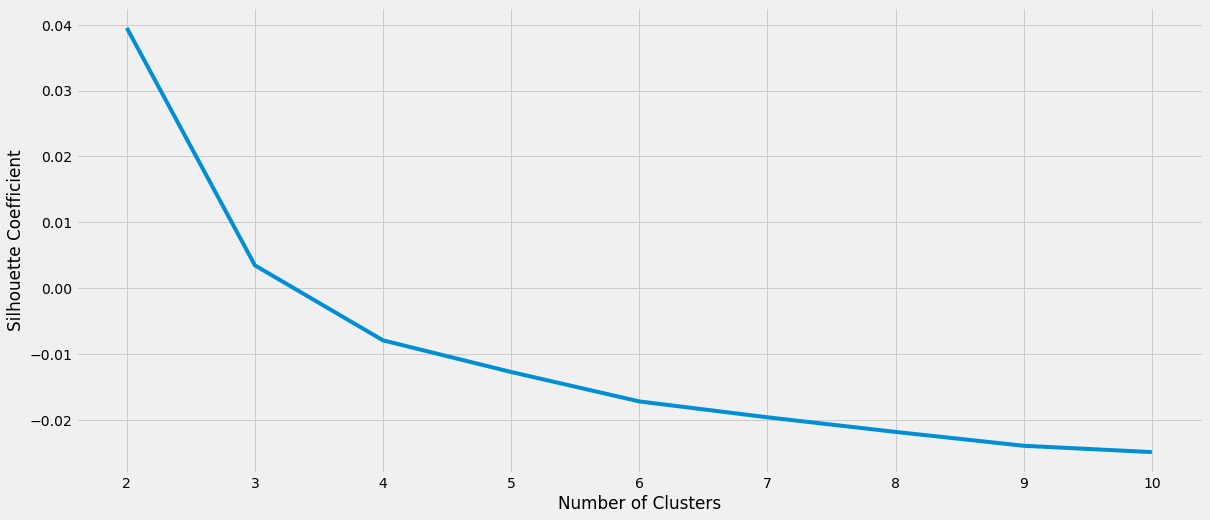

In [65]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

На этом графике оптимальным является значение k = 4. Клиенты будут группироваться по четырем кластерам.

## Предсказание кластера

In [68]:
cluster_labels = kmeans.fit_predict(scaled_data)

In [71]:
labels = kmeans.labels_

In [72]:
kmeans_data = pd.DataFrame(data)
kmeans_data['K_Means_Clusters'] = labels
kmeans_data.head()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT,K_Means_Clusters
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,1,1,60,12,963.01,1,1,2,2,3
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,1,0,91,15,1534.69,1,1,2,2,3
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,1,1,13,2,1514.48,1,1,3,3,0
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,1,0,68,35,1872.24,1,1,2,2,3
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,1,1,22,3,557.97,1,1,1,1,0
5,5820,126.7058,31,2,54.6964,75,3927.88,524,23,1,...,1,1,15,2,283.75,1,0,1,1,0
6,5828,200.1724,49,2,77.2001,129,9808.45,674,29,13,...,1,0,49,12,828.24,1,1,2,2,2
7,5834,322.5265,29,4,79.0809,118,9353.27,1004,34,5,...,1,0,28,4,456.83,1,1,3,3,2
8,5859,226.8513,38,4,59.8023,149,8620.35,890,28,5,...,1,0,57,11,1043.49,1,1,2,2,2
9,5860,159.6940,32,2,73.1680,78,5601.56,528,33,4,...,1,0,21,9,816.63,1,0,2,2,2


In [73]:
kmeans_data.K_Means_Clusters.value_counts()

2    8614
0    6947
1    6651
3    5055
Name: K_Means_Clusters, dtype: int64